<a href="https://colab.research.google.com/github/nirmal-rawal/ML-Learn-And-Build/blob/main/Feature_Scaling_Standardization_%7C_Day_24.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
df= pd.read_csv("/content/SampleFile.csv")

In [ ]:
df.shape

(1460, 2)

In [ ]:
df.sample(5)

,LotArea,MSSubClass
1421,4043,120
99,9320,20
994,12456,20
903,14859,20
405,9991,20


In [ ]:
df.columns

Index(['LotArea', 'MSSubClass'], dtype='object')

In [ ]:
df.describe()

,LotArea,MSSubClass
count,1460.000000,1460.000000
mean,10516.828082,56.897260
std,9981.264932,42.300571
min,1300.000000,20.000000
25%,7553.500000,20.000000
50%,9478.500000,50.000000
75%,11601.500000,70.000000
max,215245.000000,190.000000


In [ ]:
df.head(5)

,LotArea,MSSubClass
0,8450,60
1,9600,20
2,11250,60
3,9550,70
4,14260,60


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   LotArea     1460 non-null   int64
 1   MSSubClass  1460 non-null   int64
dtypes: int64(2)
memory usage: 22.9 KB


In [ ]:
df.isnull().sum()

,0
LotArea,0
MSSubClass,0


In [ ]:
df.duplicated().sum()

226

In [ ]:
df.corr()['LotArea']

,LotArea
LotArea,1.000000
MSSubClass,-0.139781


<Axes: xlabel='MSSubClass', ylabel='count'>

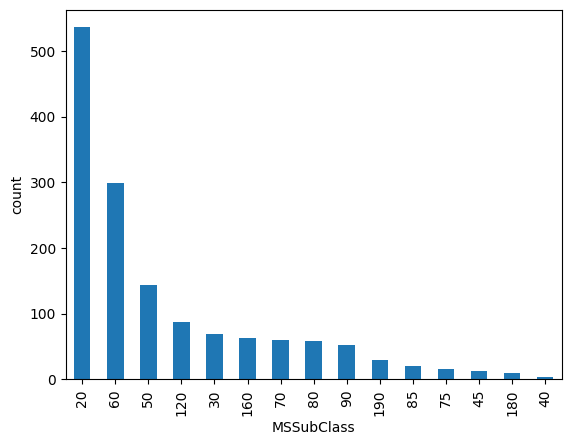

In [ ]:
sns.countplot(df['LotArea'])
df['MSSubClass'].value_counts().plot(kind='bar')

In [ ]:
import matplotlib.pyplot as plt

(array([605., 160., 359.,  94.,  52.,  87.,   0.,   0.,  63.,  40.]),
 array([ 20.,  37.,  54.,  71.,  88., 105., 122., 139., 156., 173., 190.]),
 <BarContainer object of 10 artists>)

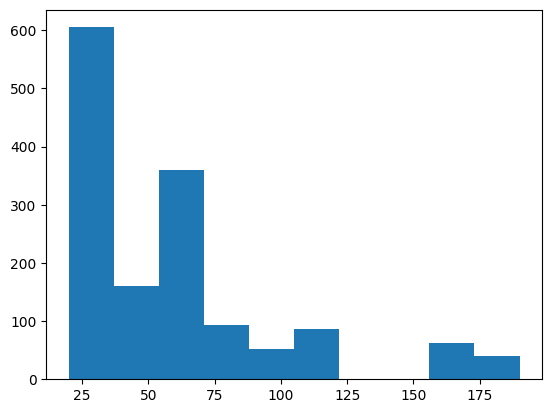

In [ ]:
plt.hist(df['MSSubClass'])

<ipython-input-30-8ee0c640b959>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['LotArea'])


<Axes: xlabel='LotArea', ylabel='Density'>

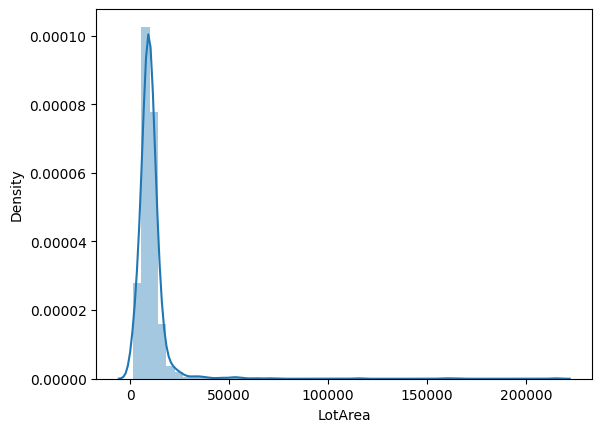

In [ ]:
sns.distplot(df['LotArea'])

In [ ]:
df.columns

Index(['LotArea', 'MSSubClass'], dtype='object')

<Axes: xlabel='LotArea', ylabel='MSSubClass'>

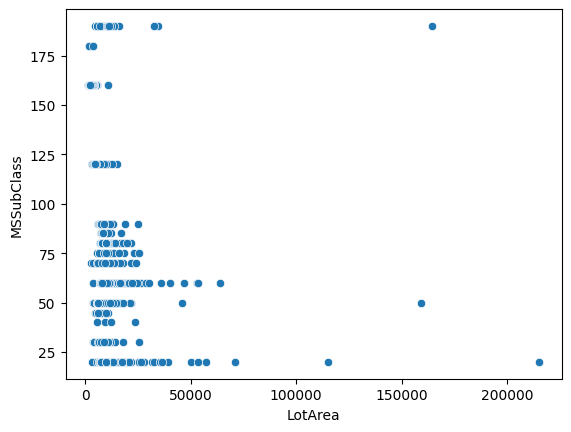

In [ ]:
sns.scatterplot(x=df['LotArea'],y=df['MSSubClass'])

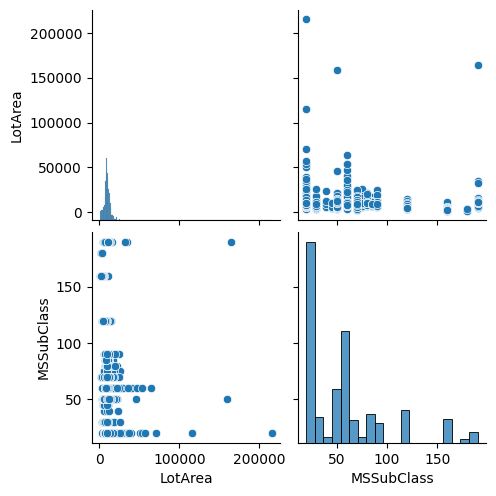

In [ ]:
sns.pairplot(df)

StandardScaler

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [ ]:
scaler.fit(df)
df_scaled=scaler.transform(df)

In [ ]:
scaler.mean_

array([10516.82808219,    56.89726027])

In [ ]:
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)

In [ ]:
df_scaled

,LotArea,MSSubClass
0,-0.207142,0.073375
1,-0.091886,-0.872563
2,0.073480,0.073375
3,-0.096897,0.309859
4,0.375148,0.073375
...,...,...
1455,-0.260560,0.073375
1456,0.266407,-0.872563
1457,-0.147810,0.309859
1458,-0.080160,-0.872563


In [ ]:
np.round(df_scaled.describe(),1)

,LotArea,MSSubClass
count,1460.0,1460.0
mean,-0.0,-0.0
std,1.0,1.0
min,-0.9,-0.9
25%,-0.3,-0.9
50%,-0.1,-0.2
75%,0.1,0.3
max,20.5,3.1


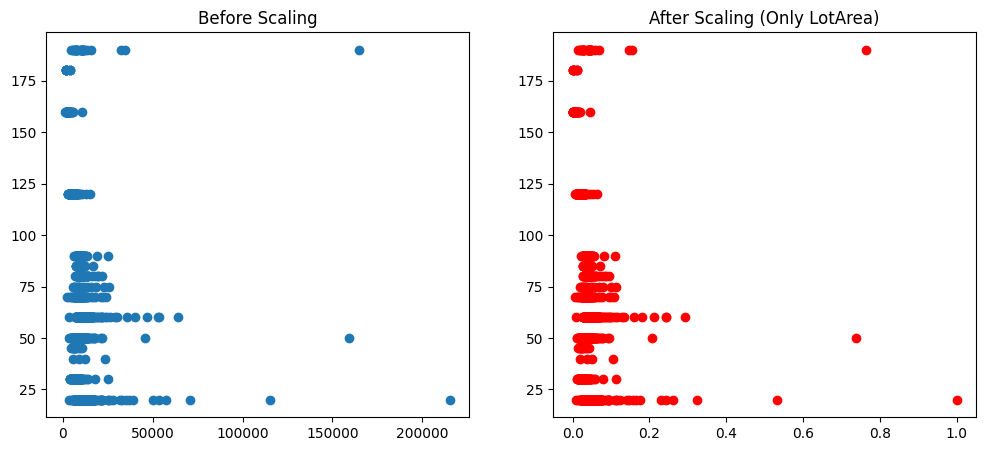

In [ ]:
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Initialize scaler
scaler = MinMaxScaler()

# Scale only 'LotArea'
df_scaled = df.copy()  # Keep a copy of original data
df_scaled['LotArea'] = scaler.fit_transform(df[['LotArea']])

# Plot
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(df['LotArea'], df['MSSubClass'])
ax1.set_title("Before Scaling")

ax2.scatter(df_scaled['LotArea'], df_scaled['MSSubClass'], color='red')
ax2.set_title("After Scaling (Only LotArea)")

plt.show()
